In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='dippi8', api_key='UiKe2OaE7zVcJmCKC9oE')

In [4]:
#targets:
#    0: porn
#    1: propaganda
#    2: spam
#    3: fake followers
#    4: genuine accounts

porn = pd.read_csv('data/porn/users.csv', encoding='utf-8-sig')
porn['target'] = 0

propaganda = pd.read_csv('data/propaganda/users.csv', encoding='utf-8-sig')
propaganda['target'] = 1

spam = pd.read_csv('data/spam/users.csv', encoding='utf-8-sig')
spam['target'] = 2

fake_followers = pd.read_csv('data/fake_followers/users.csv', encoding='utf-8-sig')
fake_followers['target'] = 3
chosen_idx = np.random.choice(8825, replace=False, size=5000)
fake_followers = fake_followers.iloc[chosen_idx]

genuine = pd.read_csv('data/genuine/users.csv', encoding='utf-8-sig')
genuine['target'] = 4

frames = [porn, propaganda, spam, fake_followers, genuine]
users = pd.concat(frames, ignore_index=True)

In [5]:
users.drop(columns=['follow_request_sent', 'following', 'notifications', 'contributors_enabled','id'], inplace=True)

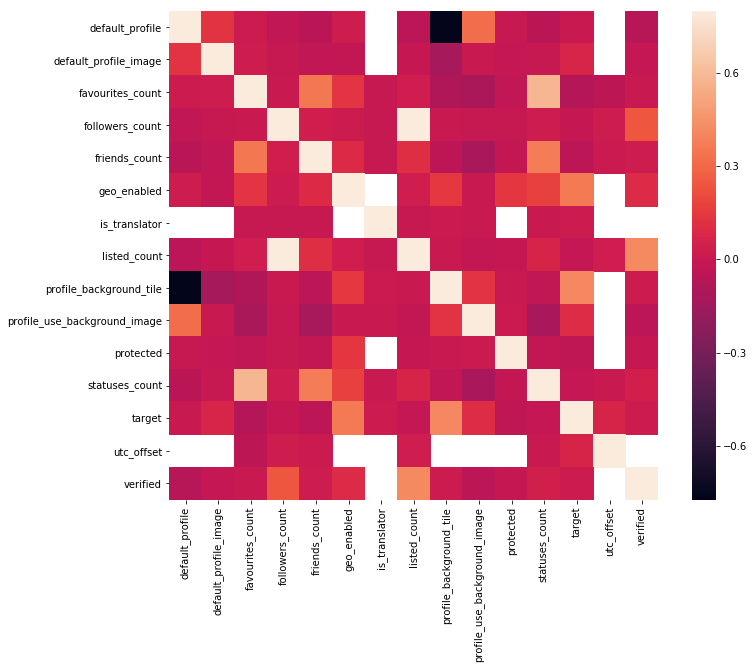

In [6]:
#correlation matrix
corrmat = users.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(corrmat, vmax=.8, square=True)
plt.savefig('../../Doc/Template/chapter3/figure/heatmap.svg')

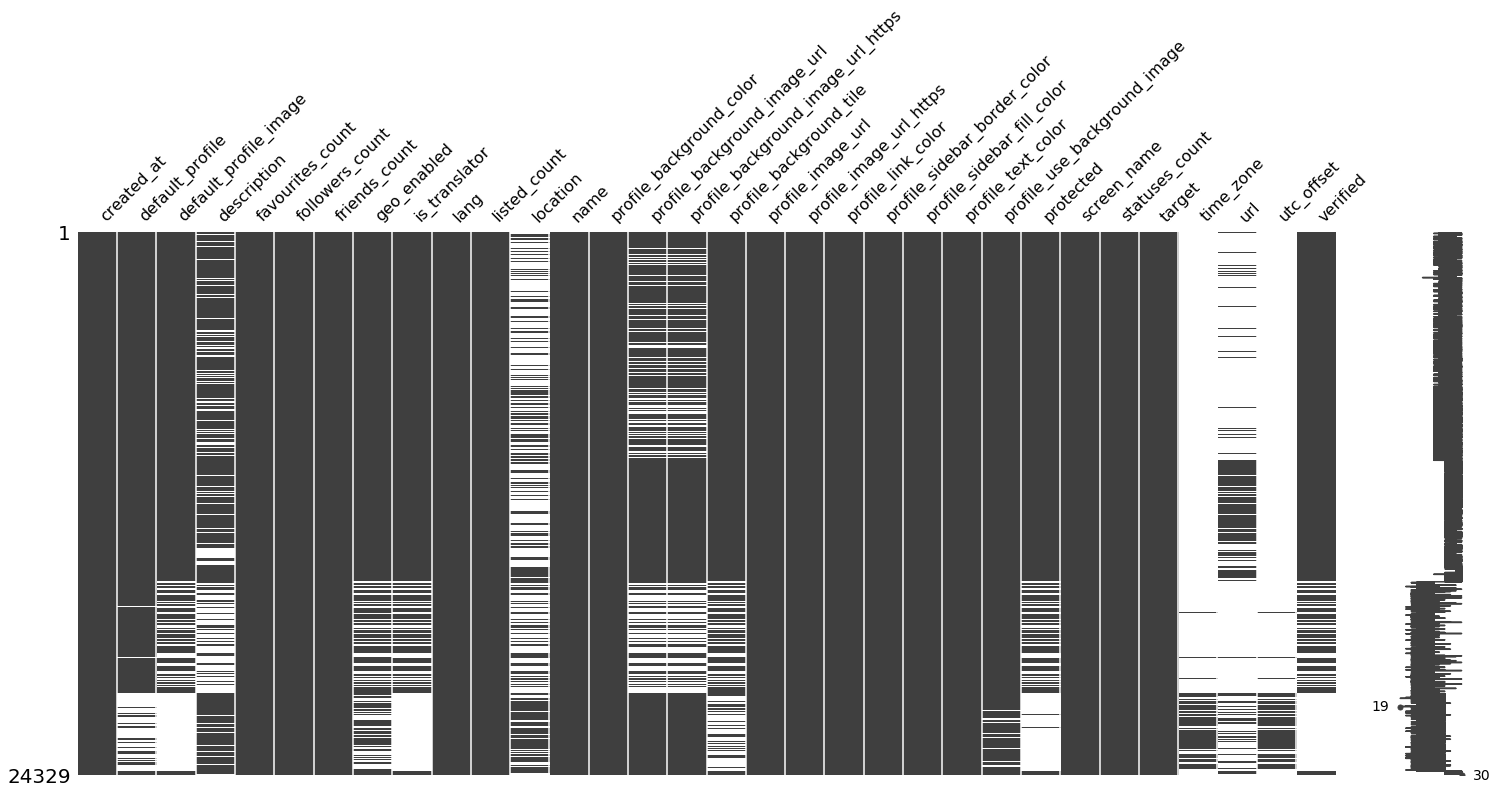

In [7]:
fig = msno.matrix(users)
plt.margins(200)
plt.savefig("../../Doc/Template/chapter3/figure/msno.jpg")

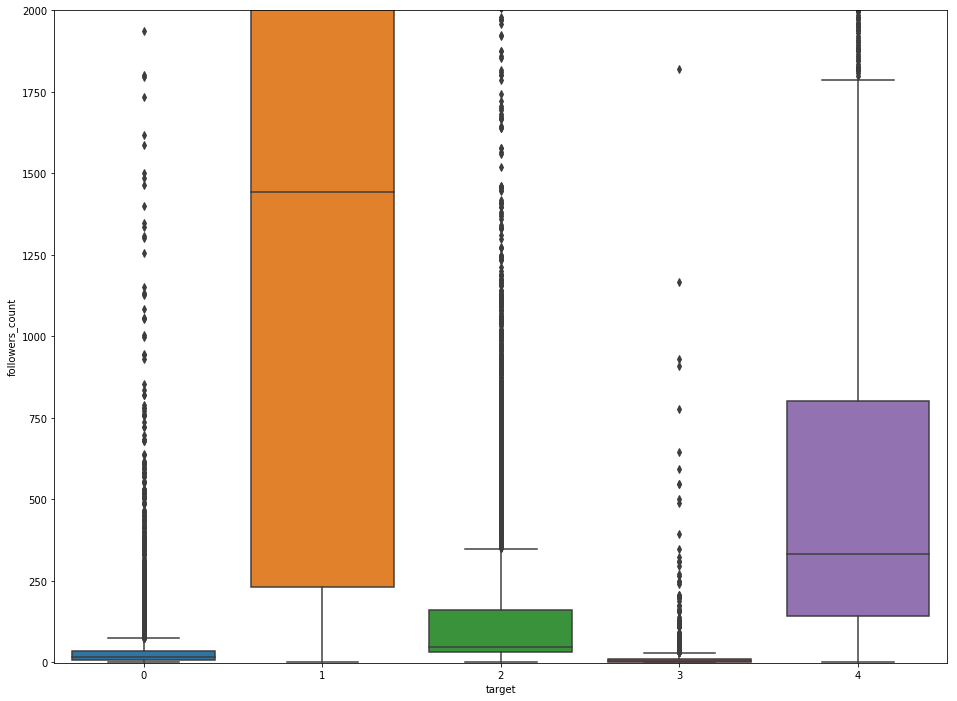

In [46]:
data = pd.concat([users['target'], users['followers_count']], axis=1)
f, ax = plt.subplots(figsize=(16, 12))
fig = sns.boxplot(x='target', y="followers_count", data=data)
fig.axis(ymin=-1, ymax=2000)
plt.savefig("../../Doc/Template/chapter3/figure/boxplot_followers.svg")

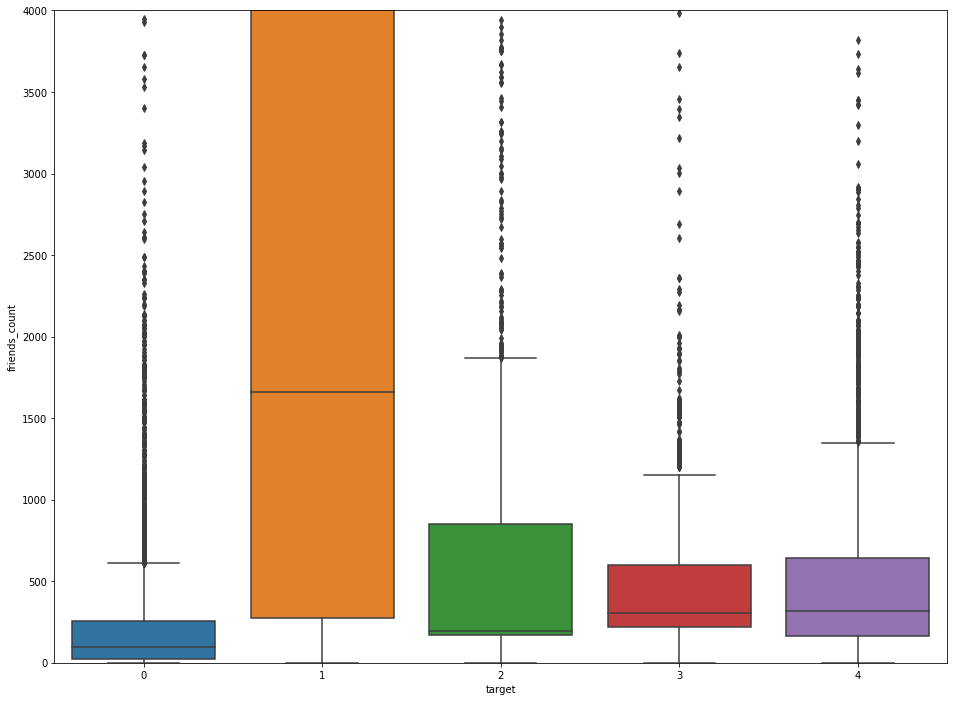

In [44]:
data = pd.concat([users['target'], users['friends_count']], axis=1)
f, ax = plt.subplots(figsize=(16, 12))
fig = sns.boxplot(x='target', y="friends_count", data=data)
fig.axis(ymin=-1, ymax=4000)
plt.savefig("../../Doc/Template/chapter3/figure/boxplot_friends.svg")

In [24]:
full = pd.read_csv('data/full/train.csv')

In [25]:
def cento(x):
    if x > 100:
        return 100
    return x

In [26]:
full['statuses_count'] = full['statuses_count'].apply(lambda x: cento(x))

In [27]:
full= full[['target', 'statuses_count']]

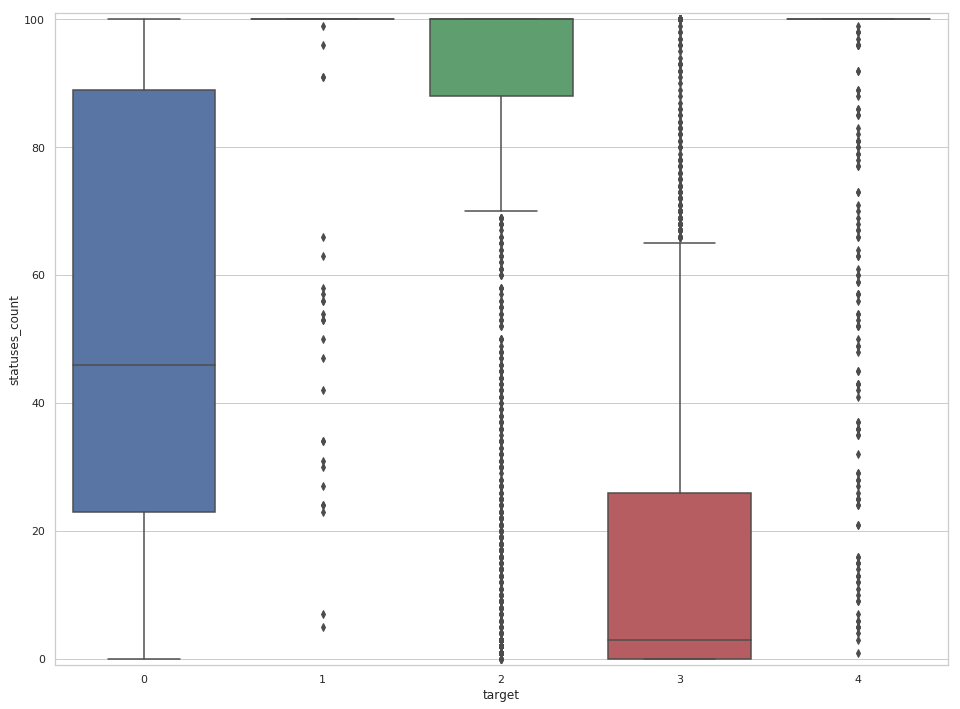

In [104]:
data = pd.concat([full['target'], full['statuses_count']], axis=1)
f, ax = plt.subplots(figsize=(16, 12))
fig = sns.boxplot(x='target', y="statuses_count", data=data)
fig.axis(ymin=-1, ymax=101)
plt.savefig("../../Doc/Template/chapter3/figure/boxplot.svg")

In [36]:
full.

63.227794152792164

In [39]:
for i in range(5):
    df = full[full.target==i]
    print (len(df), df.statuses_count.mean())

6934 52.371502740121144
2838 99.53171247357294
5361 86.10147360567058
6312 18.994613434727505
3661 98.41518710734772


In [50]:
trace0 = go.Scatter(
    x=[0,1,2,3,4],
    y=[6934, 2838, 5361, 6312, 3661],
    mode='markers',
    marker=dict(
        color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)',
               'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        opacity=[1, 1, 1, 1, 1],
        size=[52, 99, 86, 18, 98],
    )
)

layout = go.Layout(
    xaxis=dict(
        title='target',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='y Axis',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

data = [trace0]
py.iplot(data, layout=layout, filename='bubblechart-color')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~dippi8/0 or inside your plot.ly account where it is named 'bubblechart-color'
